Project Name:-DeepCSAT-Ecommerce Customer Satisfaction Score Prediction


contribute by sumit sarodiya


#Project Summary

1.Objective:-Predict customer satisfaction scores in an e-commerce platform using deep learning (DeepCSAT model).

2.Problem Statement:-Online retailers need to understand customer satisfaction from behavioral and transactional data to improve experience and retention.

3.Data Preprocessing:- Cleaning, handling missing values, encoding categorical data, and normalization.

4.Exploratory Data Analysis (EDA):- Understanding relationships between features and satisfaction levels.

5.Modules:Data Collection,Data Pre-processing,Model Building,Model Evaluation,Prediction

6.Buid Model:-Design and train a model Ann Deep Learning Model (DeepCSAT)

7.Results:-Deep Learning model (DeepCSAT) provided better accuracy than other algorithms.DeepCSAT effectively predicts customer satisfaction score.

8.Conclusion:-The project successfully predicts customer satisfaction.Helps improve business decision-making.

#EDA

->Collecting The Data

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\A S U S\Downloads\eCommerce_Customer_support_data - eCommerce_Customer_support_data.csv")
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


->Data Intraction

In [2]:
df.shape

(85907, 20)

In [3]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28739 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

->Summary Of Data

In [5]:
df.describe(include=object)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift
count,85907,85907,85907,85907,28739,67675,17214,85907,85907,85907,17079,17196,85907,85907,85907,85907,85907
unique,85907,3,12,57,17656,67675,13766,30923,30262,31,1782,9,1371,40,6,5,5
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,Wendy Taylor,Carter Park,John Smith,>90,Morning
freq,1,68142,44097,22389,2553,1,7,13,3378,3452,722,4706,429,4273,25261,30660,41426


In [6]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [7]:
df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           17656
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

->Missing Value Handling

In [8]:
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57168
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [9]:
df.fillna(0,inplace=True)

#Data Disribution of the Data

In [10]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,85907.000000,85907.000000,85907.000000
mean,1133.775967,1.302583,4.242157
std,6170.745350,27.763363,1.378903
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,164999.000000,1986.000000,5.000000


Text(0.5, 0, 'Item Price')

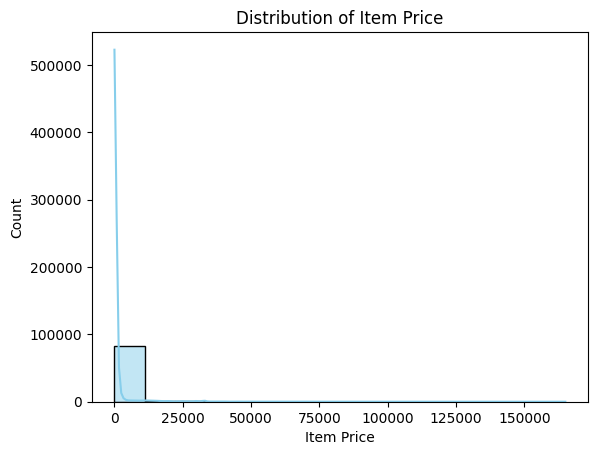

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Item_price'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')

Text(0.5, 0, 'Connected Handling Time')

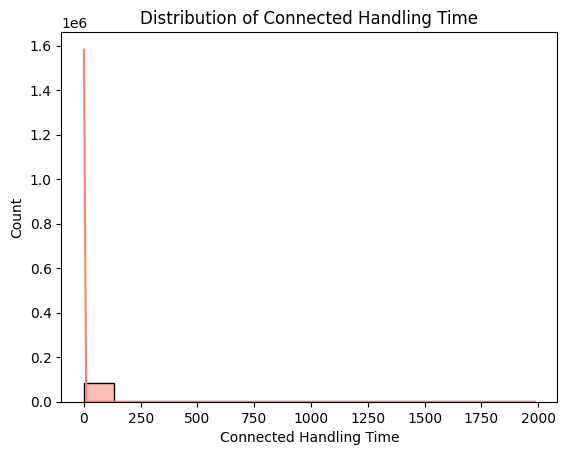

In [12]:
sns.histplot(df['connected_handling_time'], bins=15, kde=True, color='salmon')
plt.title('Distribution of Connected Handling Time')
plt.xlabel('Connected Handling Time')

Text(0.5, 0, 'CSAT Score')

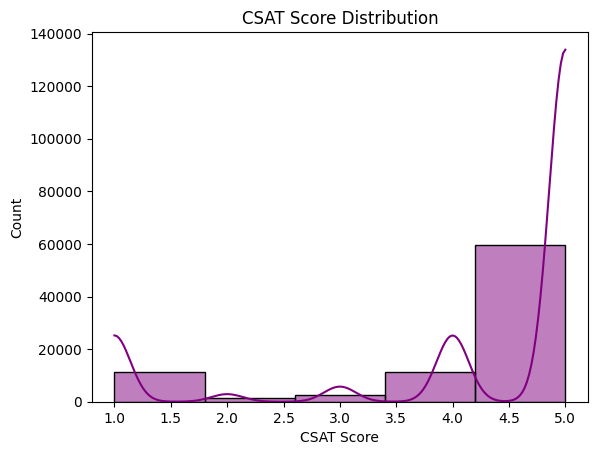

In [13]:
sns.histplot(df['CSAT Score'], bins=5, kde=True, color='purple')
plt.title('CSAT Score Distribution')
plt.xlabel('CSAT Score')

->Correlation Of The Data

In [14]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,85907.000000,85907.000000,85907.000000
mean,1133.775967,1.302583,4.242157
std,6170.745350,27.763363,1.378903
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,164999.000000,1986.000000,5.000000


In [15]:
num_cols=['Item_price','connected_handling_time','CSAT Score']

In [16]:
correlation=df[num_cols].corr()
correlation

,Item_price,connected_handling_time,CSAT Score
Item_price,1.000000,-0.004094,-0.095505
connected_handling_time,-0.004094,1.000000,0.009712
CSAT Score,-0.095505,0.009712,1.000000


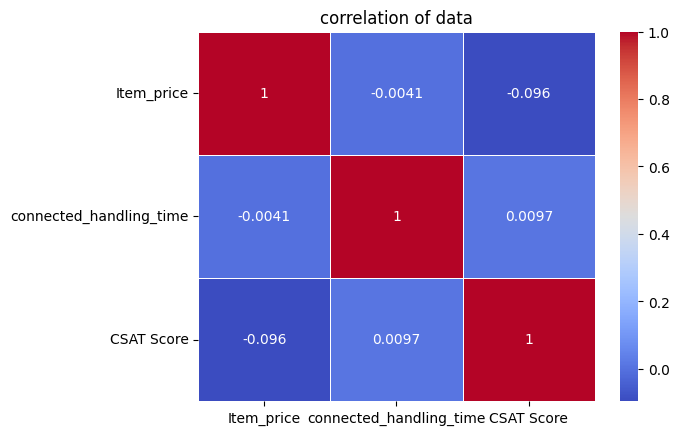

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation,cmap='coolwarm',annot=True,linewidths=0.5)
plt.title("correlation of data")
plt.show()

->Insights Of The Data

1.Item_price vs CSAT Score:-
Correlation = -0.096.There is a very small negative link between item price and customer satisfaction.This means when the item price increases, customer satisfaction slightly goes down — but the effect is very small.

2.Connected_handling_time vs CSAT Score:-
Correlation = 0.0097.The value is almost zero, meaning handling time does not affect customer satisfaction in this data.

3.Item_price vs Connected_handling_time:-
Correlation = -0.0041.This value is also close to zero, showing there is no clear relationship between how much an item costs and how long it takes to handle.

4.Overall Insight:-All the correlation values are very close to zero, which means the factors in this data are not strongly related to each other.Customer satisfaction (CSAT) may depend on other things like delivery speed, product quality, or customer service — not just price or handling time.

#Drop Unused columns

In [18]:
df.drop(['Customer Remarks','Order_id','order_date_time','Customer_City','Product_category','Unique id'],axis=1,inplace=True)

#Preprocessing

->Label Encoding

In [19]:
cat_col=['channel_name','category','Sub-category','Issue_reported at','issue_responded','Agent_name','Supervisor','Manager','Tenure Bucket','Agent Shift']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [20]:
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,2,8,19,276,306,01-Aug-23,0.0,0.0,1072,26,1,4,2,5
1,2,8,34,368,367,01-Aug-23,0.0,0.0,1323,9,3,3,2,5
2,1,5,15,771,782,01-Aug-23,0.0,0.0,370,18,5,4,1,5
3,1,10,40,810,816,01-Aug-23,0.0,0.0,1024,33,2,3,1,5
4,1,1,22,236,240,01-Aug-23,0.0,0.0,247,4,3,0,2,5


->Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df['Item_price']=scale.fit_transform(df[['Item_price']])
df['connected_handling_time']=scale.fit_transform(df[['connected_handling_time']])

->Feature Extraction

In [22]:
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

df['response_year'] = df['Survey_response_Date'].dt.year
df['response_month'] = df['Survey_response_Date'].dt.month
df['response_day'] = df['Survey_response_Date'].dt.day
df['response_weekday'] = df['Survey_response_Date'].dt.weekday
df['response_week'] = df['Survey_response_Date'].dt.isocalendar().week

C:\Users\A S U S\AppData\Local\Temp\ipykernel_19632\720770880.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')


In [23]:
df = df.drop(columns=['Survey_response_Date'])

#Split the Data

In [24]:
df[df['CSAT Score'].between(1, 5)]

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_year,response_month,response_day,response_weekday,response_week
0,2,8,19,276,306,-0.183735,-0.046918,1072,26,1,4,2,5,2023,8,1,1,31
1,2,8,34,368,367,-0.183735,-0.046918,1323,9,3,3,2,5,2023,8,1,1,31
2,1,5,15,771,782,-0.183735,-0.046918,370,18,5,4,1,5,2023,8,1,1,31
3,1,10,40,810,816,-0.183735,-0.046918,1024,33,2,3,1,5,2023,8,1,1,31
4,1,1,22,236,240,-0.183735,-0.046918,247,4,3,0,2,5,2023,8,1,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,1,9,36,29805,29386,-0.183735,-0.046918,142,14,5,4,2,4,2023,8,31,3,35
85903,1,5,42,30102,29420,-0.183735,-0.046918,776,30,0,3,2,5,2023,8,31,3,35
85904,1,5,25,30680,30005,-0.183735,-0.046918,732,1,4,4,1,5,2023,8,31,3,35
85905,1,2,50,30737,30061,-0.183735,-0.046918,295,32,4,3,2,4,2023,8,31,3,35


In [25]:
x=df.drop('CSAT Score',axis=1)
y=df['CSAT Score']

In [26]:
#Convert 1-5 to 0-4
y = y - 1 

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (68725, 17)
Test set shape: (17182, 17)


#Modeling

#Artificial Nerual Network

In [28]:
#Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ann=Sequential([
    Dense(64,activation='relu', input_shape=(x_train.shape[1],)), 
    Dense(32,activation='relu'),
    Dense(5,activation='softmax')
])

d:\Project\DeepCSAT\.myenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
#Compile the model
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Train the model
history=ann.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5188 - loss: 73.0589 - val_accuracy: 0.6703 - val_loss: 31.2777
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5227 - loss: 21.4200 - val_accuracy: 0.5761 - val_loss: 19.4037
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5262 - loss: 15.6032 - val_accuracy: 0.3081 - val_loss: 10.2274
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5286 - loss: 13.5480 - val_accuracy: 0.6646 - val_loss: 8.1745
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5302 - loss: 10.3579 - val_accuracy: 0.6963 - val_loss: 12.2639
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5327 - loss: 8.6776 - val_accuracy: 0.6891 - val_loss: 4.5573
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5354 - loss: 6.8449 - val_accuracy: 0.6947 - val_loss: 19.9447
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5401 - loss:

In [31]:
#Evaluate
loss,accuracy=ann.evaluate(x_test,y_test)
print("Test Accuracy:",accuracy)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6940 - loss: 0.9527
Test Accuracy: 0.6939820647239685


#BatchNormalization

In [32]:
#Define model
from tensorflow.keras.layers import BatchNormalization,Dropout
batnorm=Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

d:\Project\DeepCSAT\.myenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#Compile
batnorm.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
#Train
history1=batnorm.fit(x_train,y_train,validation_split=0.2,epochs=20,batch_size=64)

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6820 - loss: 1.0120 - val_accuracy: 0.6968 - val_loss: 0.9533
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6924 - loss: 0.9643 - val_accuracy: 0.6949 - val_loss: 0.9697
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6921 - loss: 0.9578 - val_accuracy: 0.6971 - val_loss: 0.9502
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6931 - loss: 0.9539 - val_accuracy: 0.6968 - val_loss: 0.9480
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6930 - loss: 0.9534 - val_accuracy: 0.6971 - val_loss: 0.9445
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6931 - loss: 0.9520 - val_accuracy: 0.6967 - val_loss: 0.9452
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6927 - loss: 0.9502 - val_accuracy: 0.6969 - val_loss: 0.9426
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6930 - loss: 0.9495 - val_accuracy: 0.

In [35]:
# Evaluate
loss, accuracy=batnorm.evaluate(x_test,y_test)
print("Test Accuracy:",accuracy)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6938 - loss: 0.9439
Test Accuracy: 0.6938074827194214


#Comapre the Model

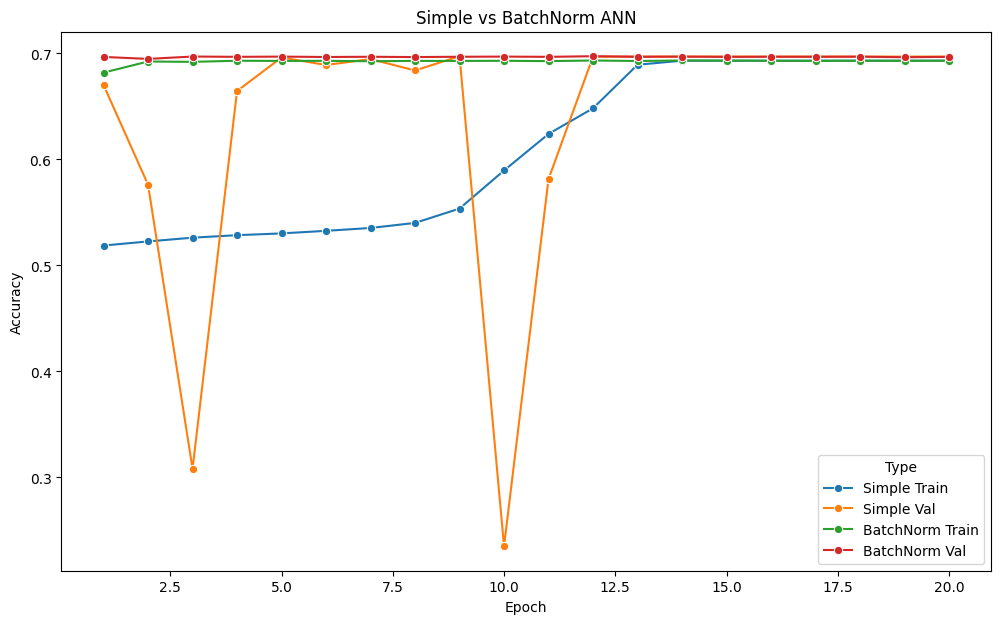

In [36]:
df_acc = pd.DataFrame({
    'Simple Train': history.history['accuracy'],
    'Simple Val': history.history['val_accuracy'],
    'BatchNorm Train': history1.history['accuracy'],
    'BatchNorm Val': history1.history['val_accuracy']
})

#Add epoch column automatically
df_acc['Epoch']=df_acc.index+1

#Melt the DataFrame to long format for Seaborn
plt.figure(figsize=(12,7))
df_acc_melt=df_acc.melt(id_vars='Epoch',var_name='Type',value_name='Accuracy')
sns.lineplot(data=df_acc_melt,x='Epoch',y='Accuracy',hue='Type',marker='o')
plt.title('Simple vs BatchNorm ANN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

def create_simple_ann():
    return ann
      

def create_batchnorm_ann():
    return batnorm  

simple_model = KerasClassifier(model=create_simple_ann, epochs=20, batch_size=32, verbose=0)
batchnorm_model = KerasClassifier(model=create_batchnorm_ann, epochs=20, batch_size=64, verbose=0)

#Stratified 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Run cross-validation
scores_simple = cross_val_score(simple_model, x_train, y_train, cv=kf)
scores_batchnorm = cross_val_score(batchnorm_model, x_train, y_train, cv=kf)


df_cv=pd.DataFrame({
    'Fold': range(1, len(scores_simple) + 1),
    'Simple ANN': scores_simple,
    'BatchNorm ANN': scores_batchnorm
})

print(df_cv)
print("\nAverage Accuracy:")
print("Simple ANN:", scores_simple.mean())
print("BatchNorm ANN:", scores_batchnorm.mean())


   Fold  Simple ANN  BatchNorm ANN
0     1    0.693925       0.693270
1     2    0.693998       0.693780
2     3    0.693998       0.693998
3     4    0.693998       0.692688
4     5    0.693925       0.693416

Average Accuracy:
Simple ANN: 0.6939687158966896
BatchNorm ANN: 0.6934303383048381


#Visualize Important Feauture

->ANN

In [48]:
#Model Summary
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,193 (39.82 KB)

 Trainable params: 3,397 (13.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,796 (26.55 KB)

537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step


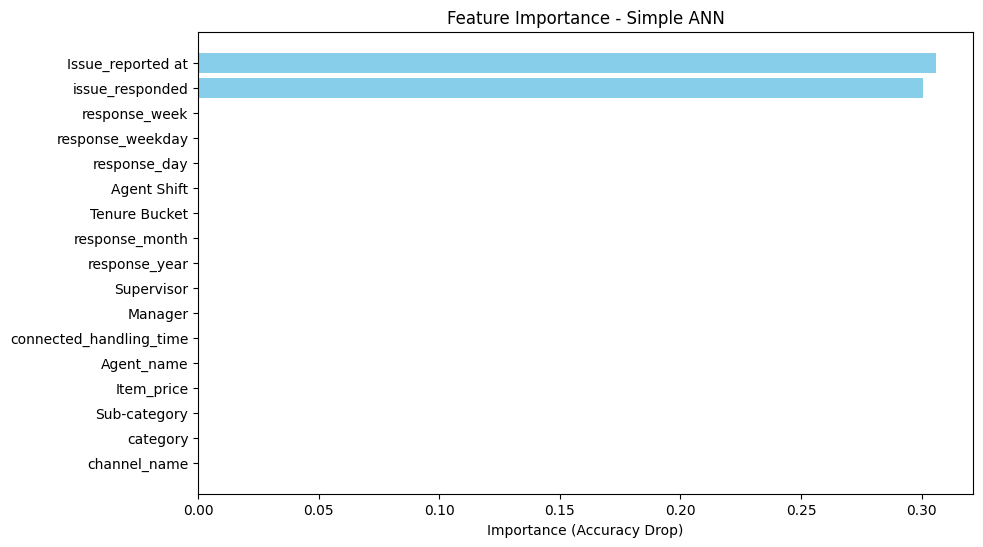

In [ ]:
base_acc = np.mean(np.argmax(ann.predict(x_test), axis=1) == y_test)
imp_simple = []

for col in x_test.columns:
    temp = x_test.copy()
    temp[col] = np.random.permutation(temp[col])
    acc = np.mean(np.argmax(ann.predict(temp), axis=1) == y_test)
    imp_simple.append(base_acc - acc)

feat_imp_simple = pd.DataFrame({'Feature': x_test.columns, 'Importance': imp_simple}).sort_values('Importance')

plt.barh(feat_imp_simple['Feature'], feat_imp_simple['Importance'], color='skyblue')
plt.xlabel("Importance (Accuracy Drop)")
plt.title("Feature Importance - Simple ANN")
plt.show()


->Batch Normalization

In [49]:
#Model Summary
batnorm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,953 (156.07 KB)

 Trainable params: 13,189 (51.52 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 26,380 (103.05 KB)

537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step


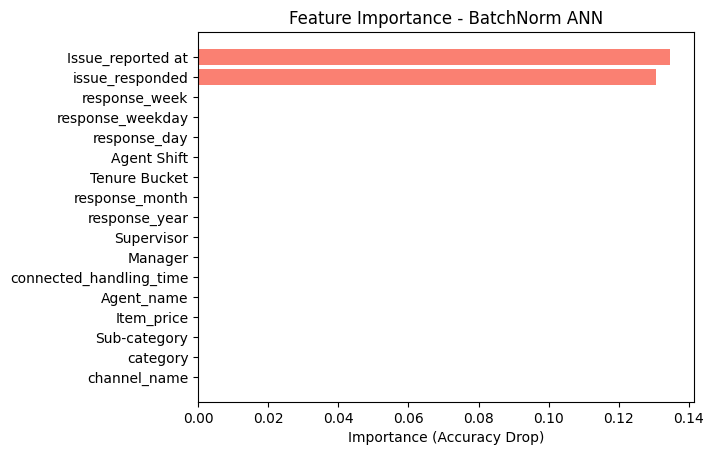

In [56]:
base_acc2 = np.mean(np.argmax(batnorm.predict(x_test), axis=1) == y_test)
imp_batch = []

for col in x_test.columns:
    temp = x_test.copy()
    temp[col] = np.random.permutation(temp[col])
    acc = np.mean(np.argmax(batnorm.predict(temp), axis=1) == y_test)
    imp_batch.append(base_acc2 - acc)

feat_imp_batch = pd.DataFrame({'Feature': x_test.columns, 'Importance': imp_batch}).sort_values('Importance')

plt.barh(feat_imp_batch['Feature'], feat_imp_batch['Importance'], color='salmon')
plt.xlabel("Importance (Accuracy Drop)")
plt.title("Feature Importance - BatchNorm ANN")
plt.show()



#Final Conclusion

1.Since Simple ANN performs slightly better and is simpler, it is the preferred modelhere.

2.The timing of issue_reported_at and issue_responded has the most significant effect on outcomes, indicating that monitoring and optimizing response times can greatly influence efficiency and performance.

3.Likely, the timing of issue reporting and response plays a major role in determining the outcome.

In [ ]:
#save model
ann.save("Ann model.h5")  
print("Model saved")

Model saved
